# **Task 2: Training from scratch: pointclouds**

In [1]:
# necessary imports
import os
import glob
import numpy
import pandas
import random
import trimesh
import logging
import tensorflow
from tensorflow.keras import models, layers, regularizers, optimizers, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Lambda, Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout, BatchNormalization, Input, concatenate

# import Stratified K-Fold Cross Validation notebook
%run KFold-Cross-Validation.ipynb

# dataset root path
DATASET_ROOT = '/run/media/rr/M2/DevOps/jupyter-lab/CIDL/dataset/'

# final preprocessed dataset directory path
DATASET_PATH = os.path.join(DATASET_ROOT, 'Preprocessed')

# number of classes for the classification task
NUM_CLASSES = 5

In [2]:
# only log critical messages
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

## Input Target Size

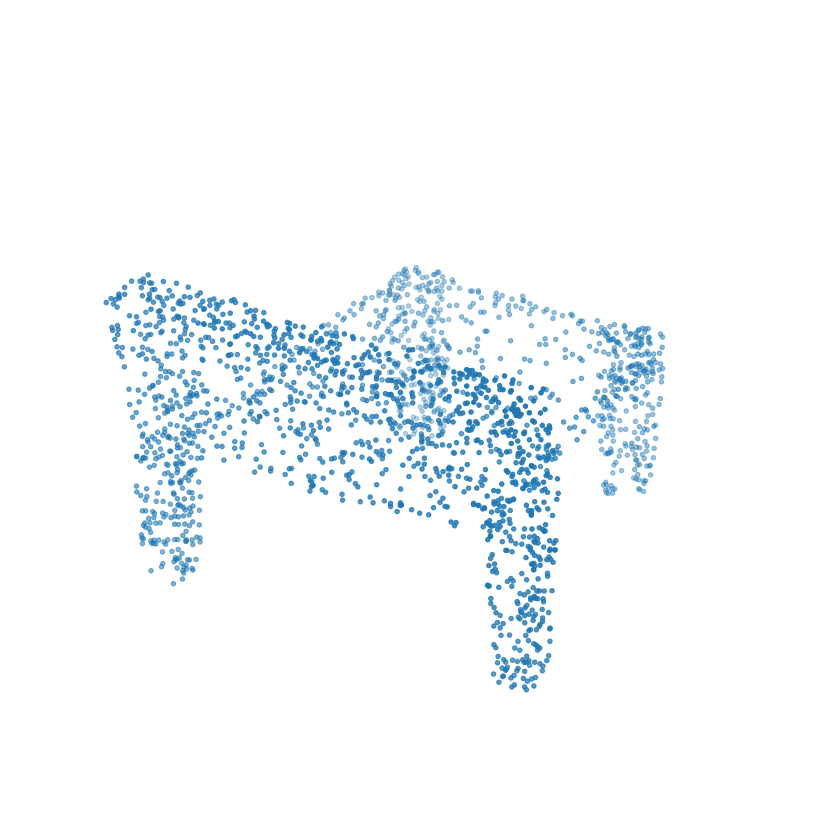

In [3]:
example_path = os.path.join(DATASET_PATH, 'Chair/pointclouds', '1.off')
example_obj_file = glob.glob(example_path)
example_mesh = trimesh.load(example_obj_file[0], force='mesh')
points = example_mesh.sample(2048)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_axis_off()
#plt.savefig('imgs/example-mesh-resolution-16384.jpg', dpi=200)
plt.show()

In [4]:
# target size
TARGET_SIZE = 2048

## Experiment 0 - Naive Model

Found 20 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 3259 validated pointcloud filenames belonging to 5 classes.
Found 652 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-0-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                   

2022-02-08 19:28:22.191012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 19:28:22.209697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 19:28:22.209817: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 19:28:22.210301: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/200


2022-02-08 19:28:23.389580: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


  1/102 [..............................] - ETA: 2:44 - loss: 2005.6373 - sparse_categorical_accuracy: 0.2188

2022-02-08 19:28:24.077116: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


 94/102 [==========================>...] - ETA: 0s - loss: 420.2351 - sparse_categorical_accuracy: 0.2098
Epoch 00001: val_loss improved from inf to 1.62725, saving model to saved_models/pointclouds/Experiment-0/Experiment-0-fold-1.h5
102/102 [==============================] - 2s 8ms/step - loss: 387.3514 - sparse_categorical_accuracy: 0.2090 - val_loss: 1.6272 - val_sparse_categorical_accuracy: 0.1994
Epoch 2/200
102/102 [==============================] - ETA: 0s - loss: 1.6099 - sparse_categorical_accuracy: 0.2001
Epoch 00002: val_loss improved from 1.62725 to 1.60951, saving model to saved_models/pointclouds/Experiment-0/Experiment-0-fold-1.h5
102/102 [==============================] - 1s 6ms/step - loss: 1.6099 - sparse_categorical_accuracy: 0.2001 - val_loss: 1.6095 - val_sparse_categorical_accuracy: 0.1994
Epoch 3/200
102/102 [==============================] - ETA: 0s - loss: 1.6096 - sparse_categorical_accuracy: 0.2001
Epoch 00003: val_loss improved from 1.60951 to 1.60948, savi

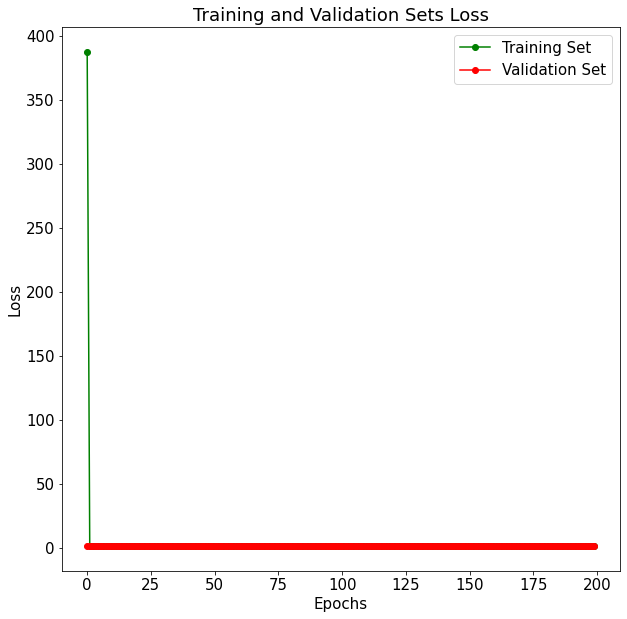

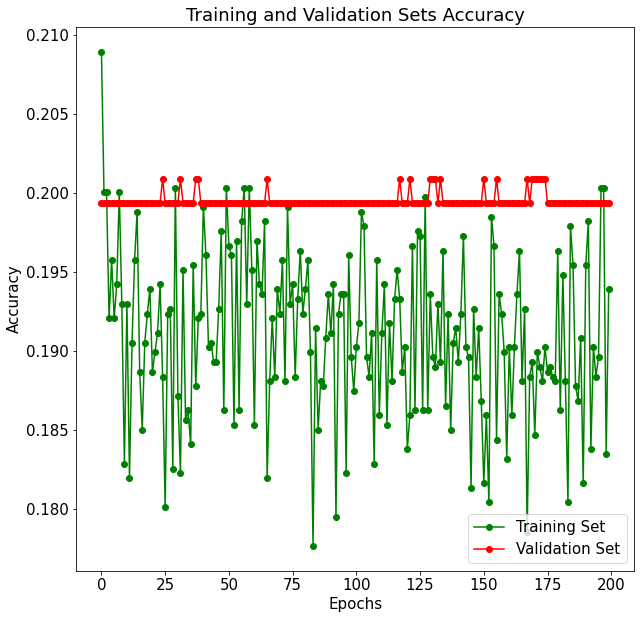

1/1 [==============================] - 0s 43ms/step - loss: 1.6094 - sparse_categorical_accuracy: 0.2000
Best model Test Loss: 1.6094391345977783
Best model Test Accuracy: 0.20000000298023224
Confusion Matrix
Normalized confusion matrix


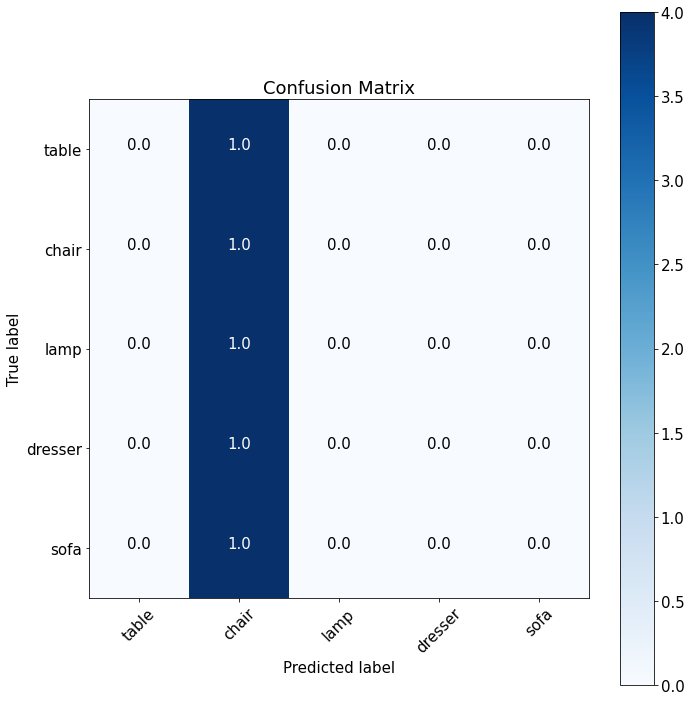

Classification Report
              precision    recall  f1-score   support

       table       0.00      0.00      0.00         4
       chair       0.20      1.00      0.33         4
        lamp       0.00      0.00      0.00         4
     dresser       0.00      0.00      0.00         4
        sofa       0.00      0.00      0.00         4

    accuracy                           0.20        20
   macro avg       0.04      0.20      0.07        20
weighted avg       0.04      0.20      0.07        20


-------- TERMINATED FOLD: 1 --------


/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [5]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
pointclouds_kfold_validation_conv2d(model_name="Experiment-0", n_splits=6, test_size=0.005,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=200,
                        batch_size=32, one_fold=True, resample_data=0, augment=False)

## Experiment 1 - Baseline

2022-02-22 11:03:03.958045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 11:03:03.978327: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 11:03:03.978445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 11:03:03.978732: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 197 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 3111 validated pointcloud filenames belonging to 5 classes.
Found 623 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2041, 32)     800         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 2033, 64)     3136        ['input_1[0][0]']                
                                                     

2022-02-22 11:05:57.530534: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


  1/195 [..............................] - ETA: 6:37 - loss: 27.3233 - sparse_categorical_accuracy: 0.1875

2022-02-22 11:05:58.405358: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


195/195 [==============================] - ETA: 0s - loss: 437.5061 - sparse_categorical_accuracy: 0.2555
Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.35313, saving model to saved_models/pointclouds/Experiment-1/Experiment-1-fold-1.h5
195/195 [==============================] - 3s 7ms/step - loss: 437.5061 - sparse_categorical_accuracy: 0.2555 - val_loss: 334.8864 - val_sparse_categorical_accuracy: 0.3531 - lr: 0.0010
Epoch 2/100
193/195 [============================>.] - ETA: 0s - loss: 396.6067 - sparse_categorical_accuracy: 0.2772
Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.35313
195/195 [==============================] - 1s 6ms/step - loss: 418.0162 - sparse_categorical_accuracy: 0.2774 - val_loss: 810.2228 - val_sparse_categorical_accuracy: 0.2905 - lr: 0.0010
Epoch 3/100
193/195 [============================>.] - ETA: 0s - loss: 336.8217 - sparse_categorical_accuracy: 0.2902
Epoch 00003: val_sparse_categorical_accuracy did not improv

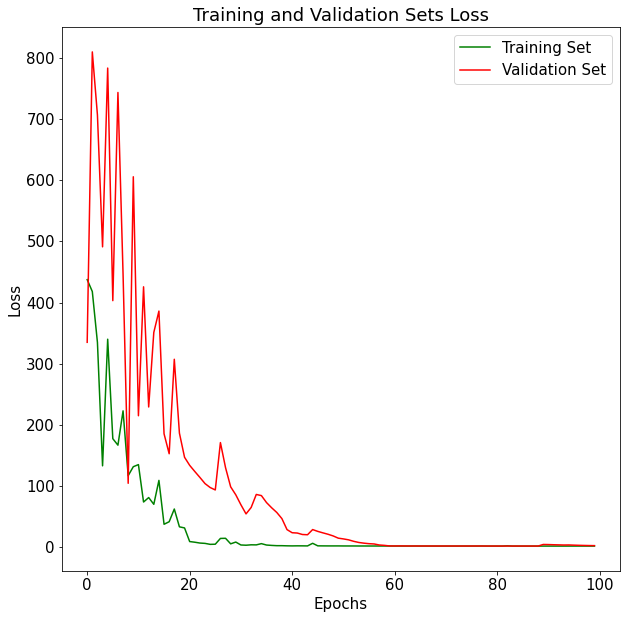

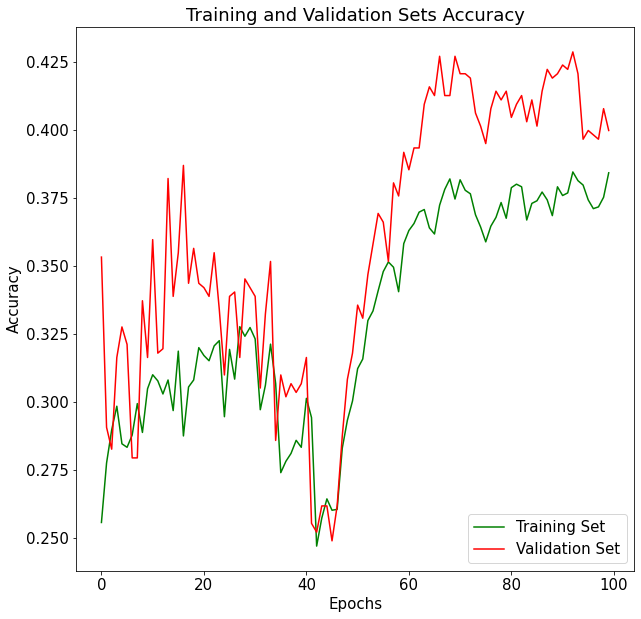

13/13 [==============================] - 0s 5ms/step - loss: 1.3983 - sparse_categorical_accuracy: 0.4365
Best model Test Loss: 1.3983466625213623
Best model Test Accuracy: 0.43654823303222656
Confusion Matrix
Normalized confusion matrix


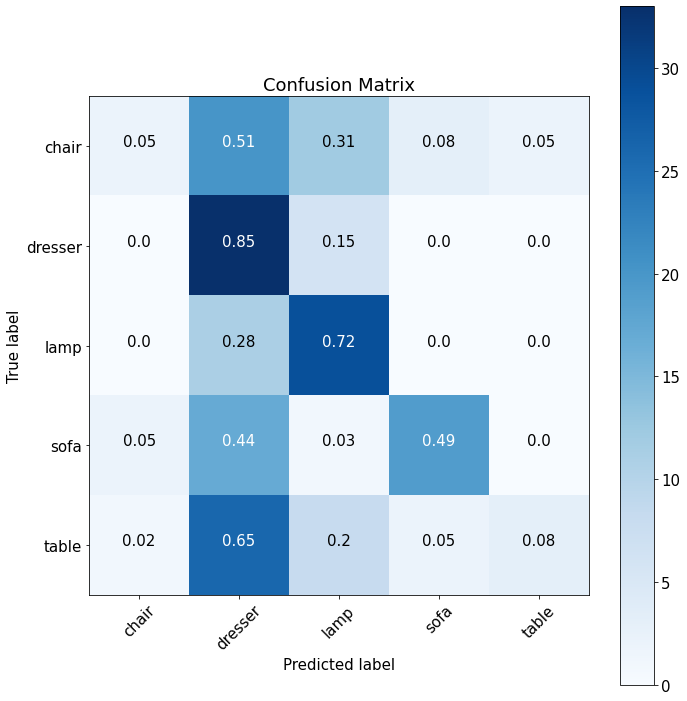

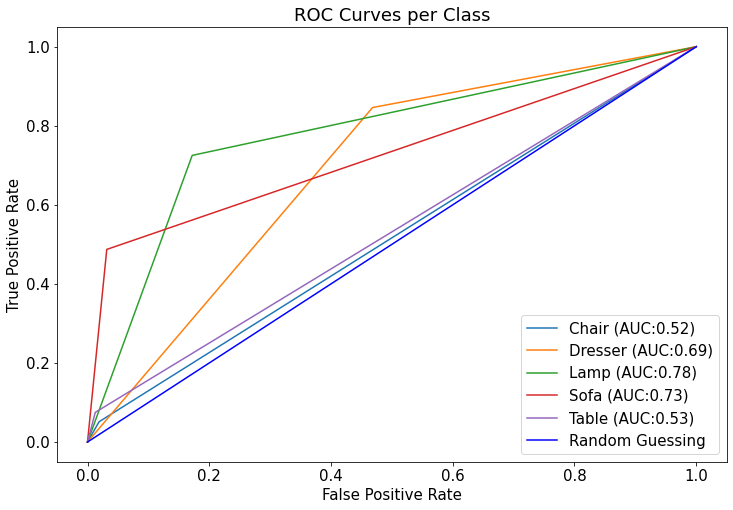

ROC AUC score: 0.6480914667047054
Classification Report
              precision    recall  f1-score   support

       chair       0.40      0.05      0.09        39
     dresser       0.31      0.85      0.45        39
        lamp       0.52      0.72      0.60        40
        sofa       0.79      0.49      0.60        39
       table       0.60      0.07      0.13        40

    accuracy                           0.44       197
   macro avg       0.52      0.44      0.38       197
weighted avg       0.52      0.44      0.38       197


-------- TERMINATED FOLD: 1 --------


In [5]:
# define model to be trained and tested
inputs = Input(shape=(TARGET_SIZE, 3))

# Conv1D and MaxPooling1D
features_8 = layers.Conv1D(32, 8, activation="relu")(inputs)
features_16 = layers.Conv1D(64, 16, activation="relu")(inputs)
features_32 = layers.Conv1D(128, 32, activation="relu")(inputs)
pooled_features_8 = layers.GlobalMaxPooling1D()(features_8)
pooled_features_16 = layers.GlobalMaxPooling1D()(features_16)
pooled_features_32 = layers.GlobalMaxPooling1D()(features_32)

# concatenate feature maps
concatenated_features = concatenate([pooled_features_8, pooled_features_16, pooled_features_32])

# feature extraction
x = layers.Dense(128, activation="relu")(concatenated_features)
x = layers.Dropout(0.4)(x)

# output softmax classifier
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

# define model
model = Model(inputs=inputs, outputs=outputs, name="Experiment-1")

# train, validate and test
pointclouds_kfold_validation_model(model_name="Experiment-1", n_splits=6, test_size=0.05,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=16, one_fold=True, resample_data=0, augment=False)

## Experiment 2 - Data Normalization and Augmentation

Found 197 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 3111 validated pointcloud filenames belonging to 5 classes.
Found 623 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2041, 32)     800         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 2033, 64)     3136        ['input_1[0][0]']                
                                                     

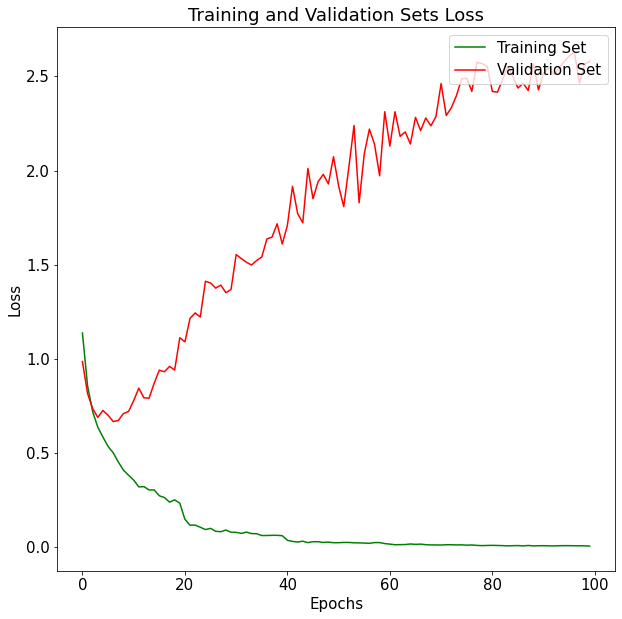

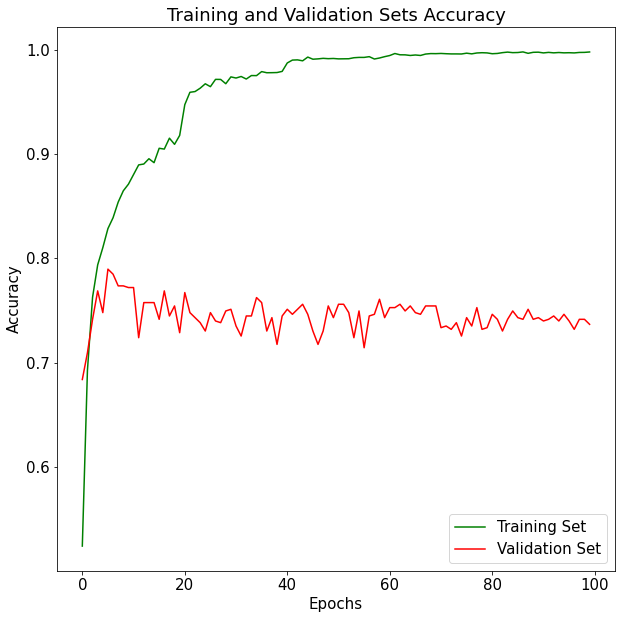

13/13 [==============================] - 0s 4ms/step - loss: 0.5430 - sparse_categorical_accuracy: 0.8173
Best model Test Loss: 0.5430160164833069
Best model Test Accuracy: 0.817258894443512
Confusion Matrix
Normalized confusion matrix


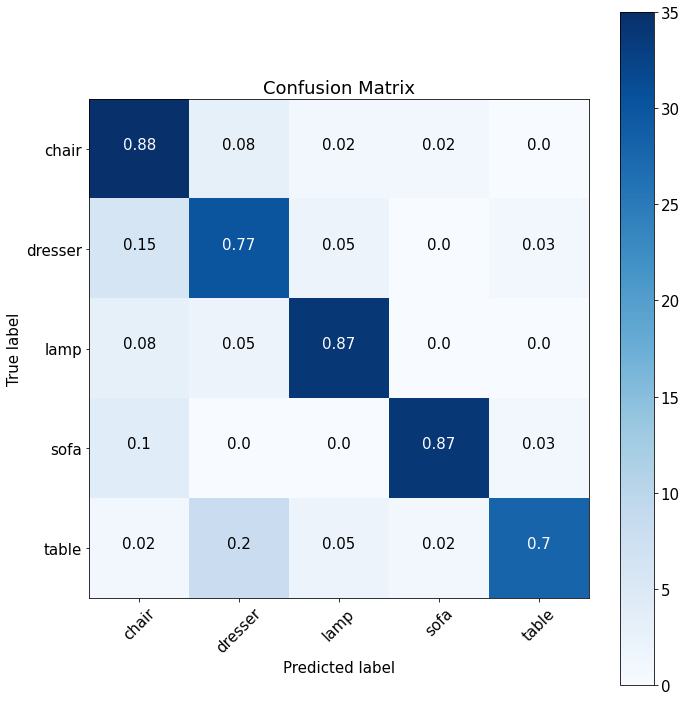

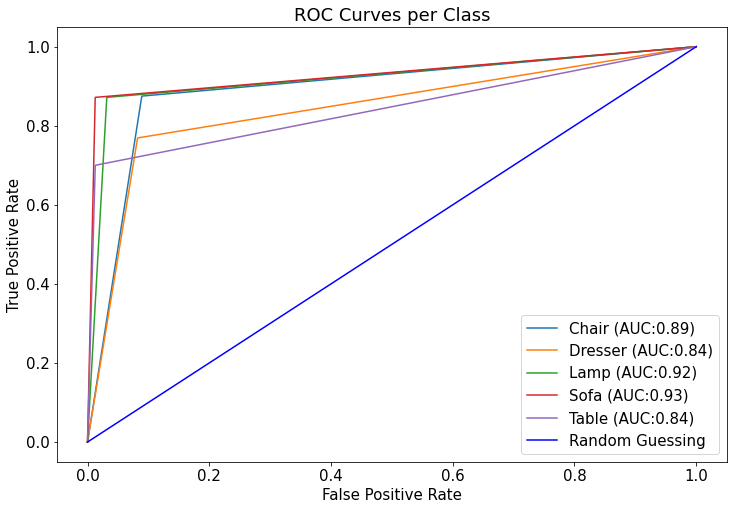

ROC AUC score: 0.8859327406314023
Classification Report
              precision    recall  f1-score   support

       chair       0.71      0.88      0.79        40
     dresser       0.70      0.77      0.73        39
        lamp       0.87      0.87      0.87        39
        sofa       0.94      0.87      0.91        39
       table       0.93      0.70      0.80        40

    accuracy                           0.82       197
   macro avg       0.83      0.82      0.82       197
weighted avg       0.83      0.82      0.82       197


-------- TERMINATED FOLD: 1 --------


In [6]:
# define model to be trained and tested
inputs = Input(shape=(TARGET_SIZE, 3))

# Conv1D and MaxPooling1D
features_8 = layers.Conv1D(32, 8, activation="relu")(inputs)
features_16 = layers.Conv1D(64, 16, activation="relu")(inputs)
features_32 = layers.Conv1D(128, 32, activation="relu")(inputs)
pooled_features_8 = layers.GlobalMaxPooling1D()(features_8)
pooled_features_16 = layers.GlobalMaxPooling1D()(features_16)
pooled_features_32 = layers.GlobalMaxPooling1D()(features_32)

# concatenate feature maps
concatenated_features = concatenate([pooled_features_8, pooled_features_16, pooled_features_32])

# feature extraction
x = layers.Dense(128, activation="relu")(concatenated_features)
x = layers.Dropout(0.4)(x)

# output softmax classifier
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

# define model
model = Model(inputs=inputs, outputs=outputs, name="Experiment-2")

# train, validate and test
pointclouds_kfold_validation_model(model_name="Experiment-2", n_splits=6, test_size=0.05,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=16, one_fold=True, resample_data=0, augment=True)

## Experiment 3 - Reduced Conv1D Filters, Higher Dropout

Found 197 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 3111 validated pointcloud filenames belonging to 5 classes.
Found 623 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2041, 16)     400         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 2033, 32)     1568        ['input_1[0][0]']                
                                                     

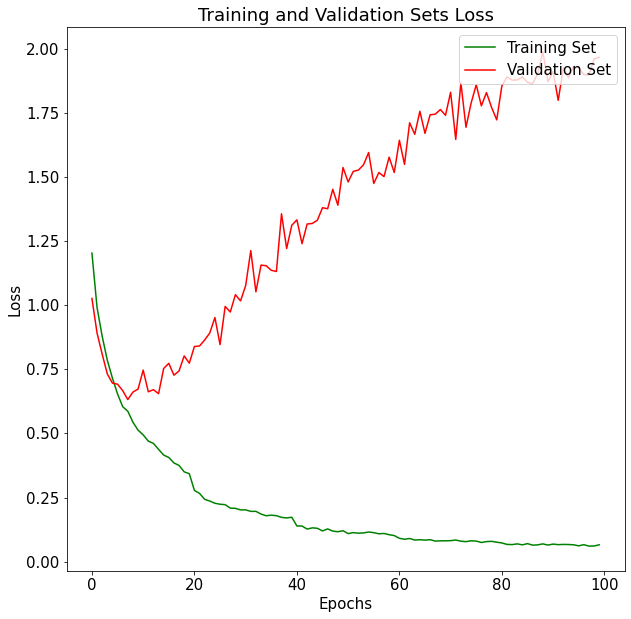

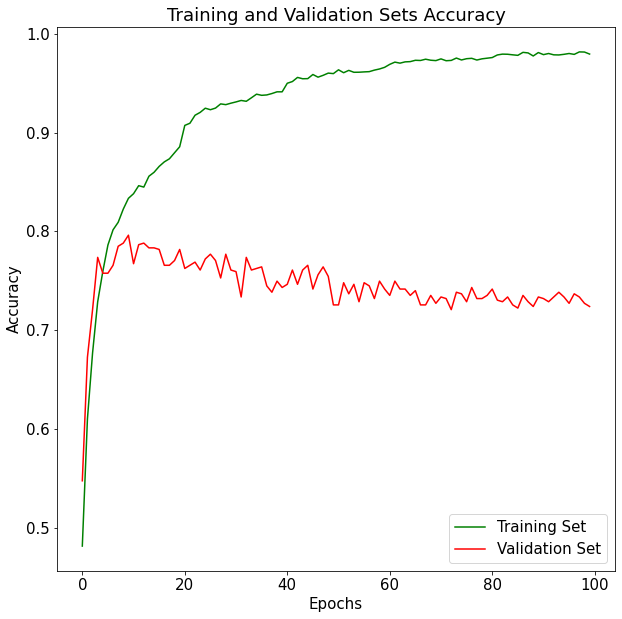

13/13 [==============================] - 0s 4ms/step - loss: 0.6405 - sparse_categorical_accuracy: 0.7970
Best model Test Loss: 0.6404595971107483
Best model Test Accuracy: 0.796954333782196
Confusion Matrix
Normalized confusion matrix


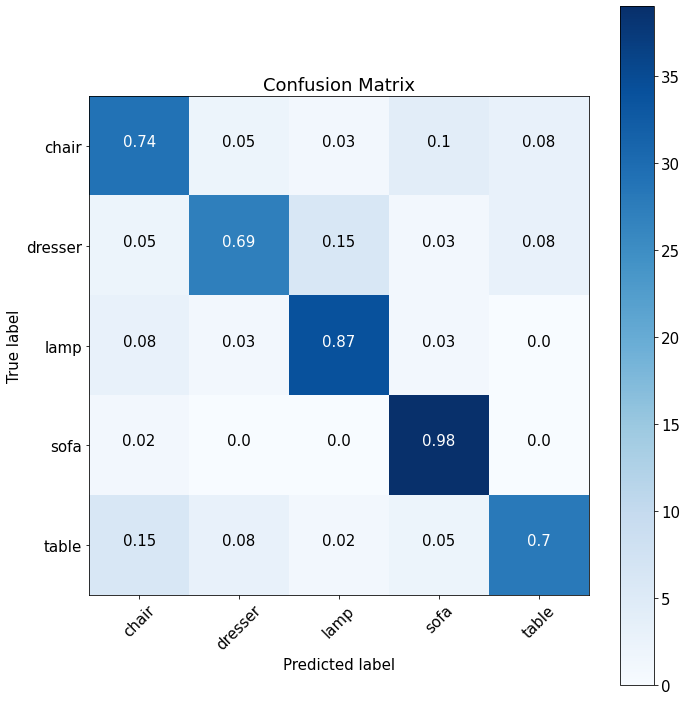

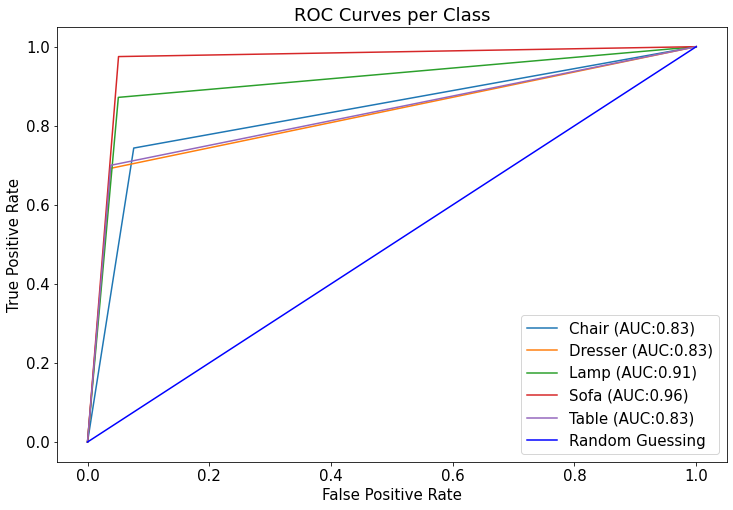

ROC AUC score: 0.8728963371144698
Classification Report
              precision    recall  f1-score   support

       chair       0.71      0.74      0.72        39
     dresser       0.82      0.69      0.75        39
        lamp       0.81      0.87      0.84        39
        sofa       0.83      0.97      0.90        40
       table       0.82      0.70      0.76        40

    accuracy                           0.80       197
   macro avg       0.80      0.80      0.79       197
weighted avg       0.80      0.80      0.79       197


-------- TERMINATED FOLD: 1 --------


In [7]:
# define model to be trained and tested
inputs = Input(shape=(TARGET_SIZE, 3))

# Conv1D and MaxPooling1D
features_8 = layers.Conv1D(16, 8, activation="relu")(inputs)
features_16 = layers.Conv1D(32, 16, activation="relu")(inputs)
features_32 = layers.Conv1D(64, 32, activation="relu")(inputs)
pooled_features_8 = layers.GlobalMaxPooling1D()(features_8)
pooled_features_16 = layers.GlobalMaxPooling1D()(features_16)
pooled_features_32 = layers.GlobalMaxPooling1D()(features_32)

# concatenate features
concatenated_features = concatenate([pooled_features_8, pooled_features_16, pooled_features_32])

# feature extraction
x = layers.Dense(128, activation="relu")(concatenated_features)
x = layers.Dropout(0.5)(x)

# output softmax classifier
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

# define model
model = Model(inputs=inputs, outputs=outputs, name="Experiment-3")

# train, validate and test
pointclouds_kfold_validation_model(model_name="Experiment-3", n_splits=6, test_size=0.05,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=16, one_fold=True, resample_data=0, augment=True)

## Experiment 4 - Reduced Conv1D Filters, New Conv1D layer

Found 197 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 3111 validated pointcloud filenames belonging to 5 classes.
Found 623 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2041, 8)      200         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 2033, 16)     784         ['input_1[0][0]']                
                                                     

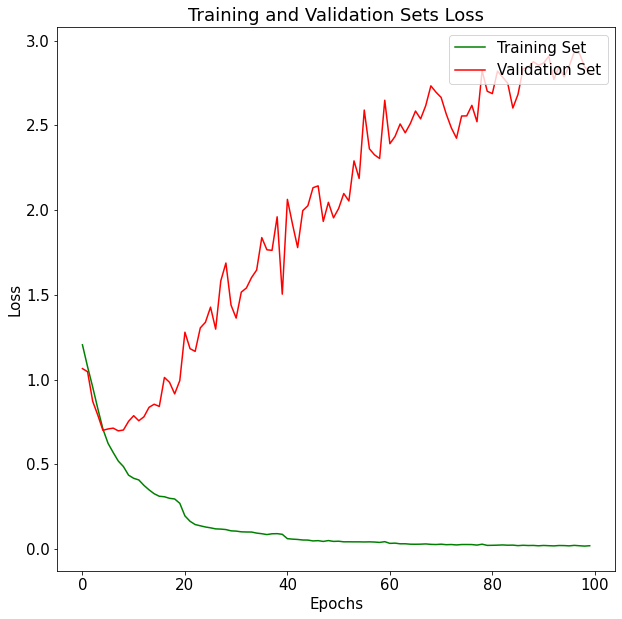

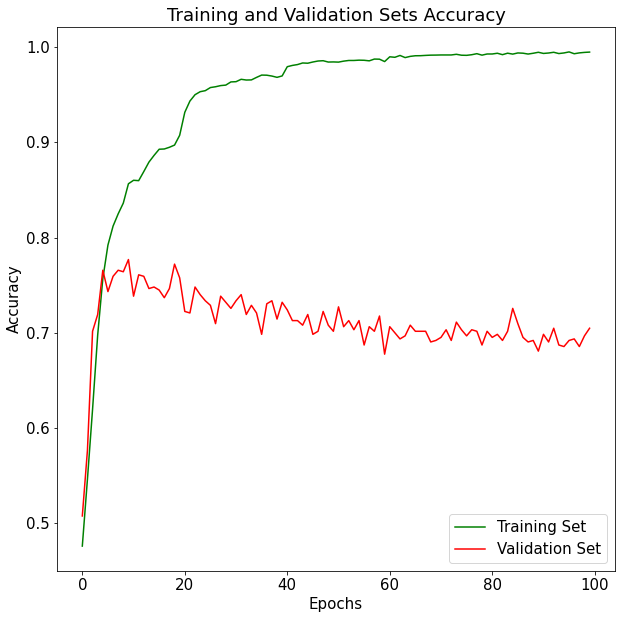

13/13 [==============================] - 0s 5ms/step - loss: 0.8206 - sparse_categorical_accuracy: 0.7614
Best model Test Loss: 0.8205848932266235
Best model Test Accuracy: 0.7614213228225708
Confusion Matrix
Normalized confusion matrix


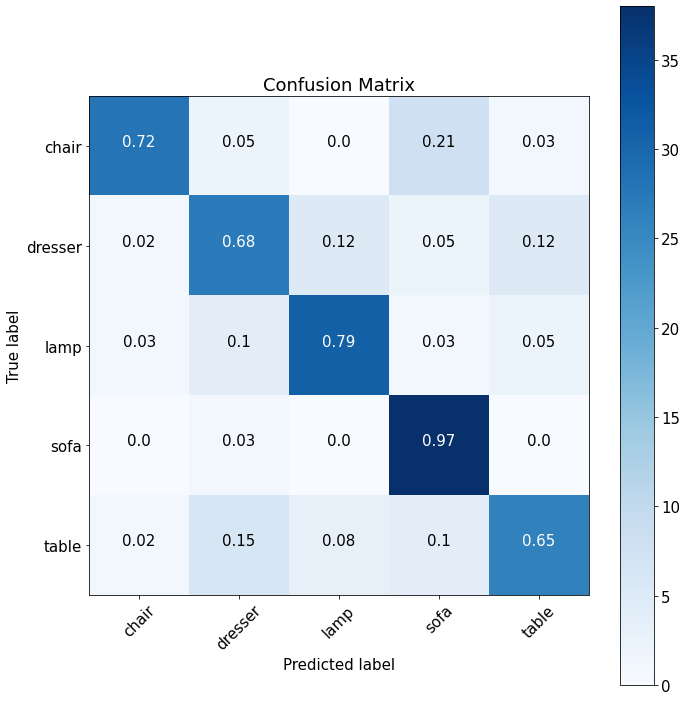

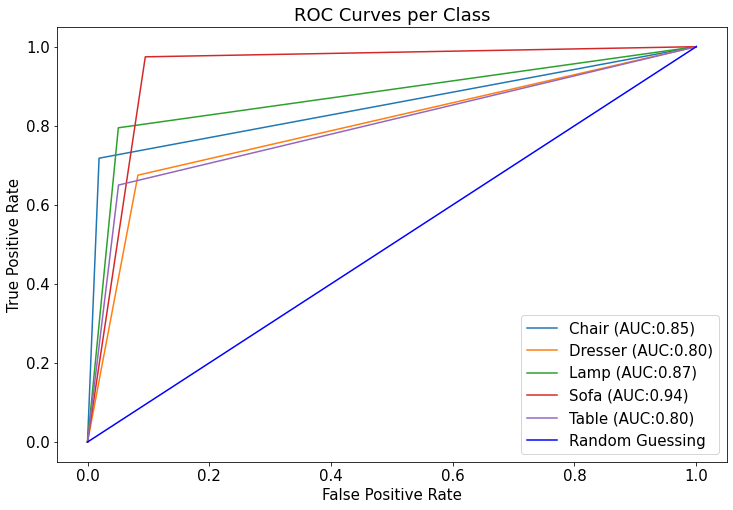

ROC AUC score: 0.8513864563370731
Classification Report
              precision    recall  f1-score   support

       chair       0.90      0.72      0.80        39
     dresser       0.68      0.68      0.68        40
        lamp       0.79      0.79      0.79        39
        sofa       0.72      0.97      0.83        39
       table       0.76      0.65      0.70        40

    accuracy                           0.76       197
   macro avg       0.77      0.76      0.76       197
weighted avg       0.77      0.76      0.76       197


-------- TERMINATED FOLD: 1 --------


In [8]:
# define model to be trained and tested
inputs = Input(shape=(TARGET_SIZE, 3))

# Conv1D and MaxPooling1D
features_8 = layers.Conv1D(8, 8, activation="relu")(inputs)
features_16 = layers.Conv1D(16, 16, activation="relu")(inputs)
features_32 = layers.Conv1D(32, 32, activation="relu")(inputs)
features_64 = layers.Conv1D(64, 64, activation="relu")(inputs)
pooled_features_8 = layers.GlobalMaxPooling1D()(features_8)
pooled_features_16 = layers.GlobalMaxPooling1D()(features_16)
pooled_features_32 = layers.GlobalMaxPooling1D()(features_32)
pooled_features_64 = layers.GlobalMaxPooling1D()(features_64)

# concatenate features
concatenated_features = concatenate([pooled_features_8, pooled_features_16, pooled_features_32, pooled_features_64])

# feature extraction
x = layers.Dense(128, activation="relu")(concatenated_features)
x = layers.Dropout(0.5)(x)

# output softmax classifier
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

# define model
model = Model(inputs=inputs, outputs=outputs, name="Experiment-4")

# train, validate and test
pointclouds_kfold_validation_model(model_name="Experiment-4", n_splits=6, test_size=0.05,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=16, one_fold=True, resample_data=0, augment=True)

## Experiment 5 - Increased Batch Size

2022-02-22 11:50:52.509330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 11:50:52.536649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 11:50:52.536771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 11:50:52.537049: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 197 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 3111 validated pointcloud filenames belonging to 5 classes.
Found 623 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2041, 8)      200         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 2033, 16)     784         ['input_1[0][0]']                
                                                     

2022-02-22 11:53:50.359208: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


  8/487 [..............................] - ETA: 3s - loss: 1.6662 - sparse_categorical_accuracy: 0.2461   

2022-02-22 11:53:51.005142: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


486/487 [============================>.] - ETA: 0s - loss: 1.2142 - sparse_categorical_accuracy: 0.4698
Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.49759, saving model to saved_models/pointclouds/Experiment-5/Experiment-5-fold-1.h5
487/487 [==============================] - 5s 7ms/step - loss: 1.2142 - sparse_categorical_accuracy: 0.4699 - val_loss: 1.1393 - val_sparse_categorical_accuracy: 0.4976 - lr: 0.0010
Epoch 2/100
481/487 [============================>.] - ETA: 0s - loss: 1.0798 - sparse_categorical_accuracy: 0.5415
Epoch 00002: val_sparse_categorical_accuracy improved from 0.49759 to 0.56982, saving model to saved_models/pointclouds/Experiment-5/Experiment-5-fold-1.h5
487/487 [==============================] - 3s 7ms/step - loss: 1.0792 - sparse_categorical_accuracy: 0.5422 - val_loss: 1.0960 - val_sparse_categorical_accuracy: 0.5698 - lr: 0.0010
Epoch 3/100
481/487 [============================>.] - ETA: 0s - loss: 1.0068 - sparse_categorical_accuracy

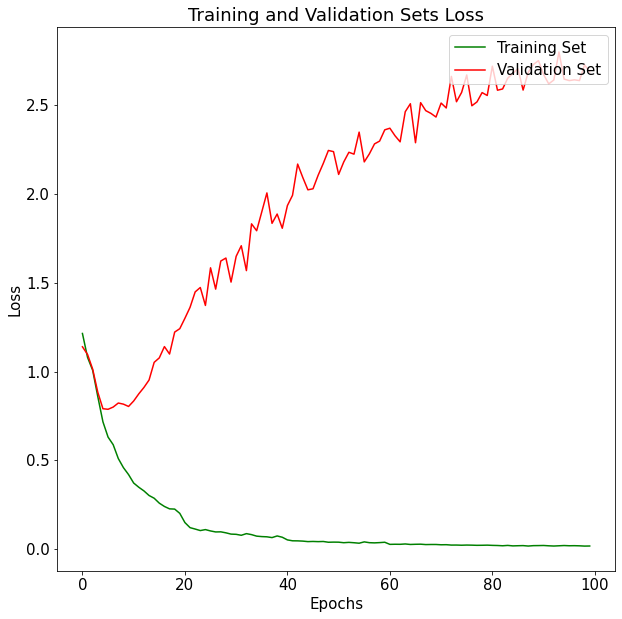

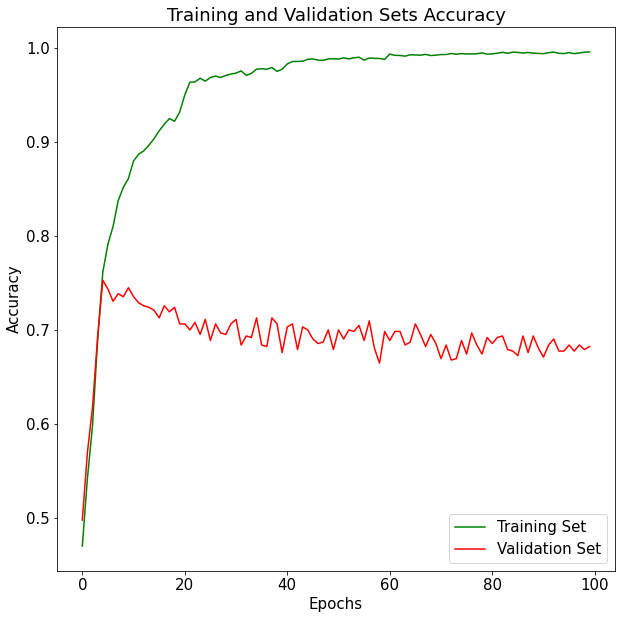

7/7 [==============================] - 0s 7ms/step - loss: 0.7328 - sparse_categorical_accuracy: 0.7766
Best model Test Loss: 0.7327508926391602
Best model Test Accuracy: 0.7766497731208801
Confusion Matrix
Normalized confusion matrix


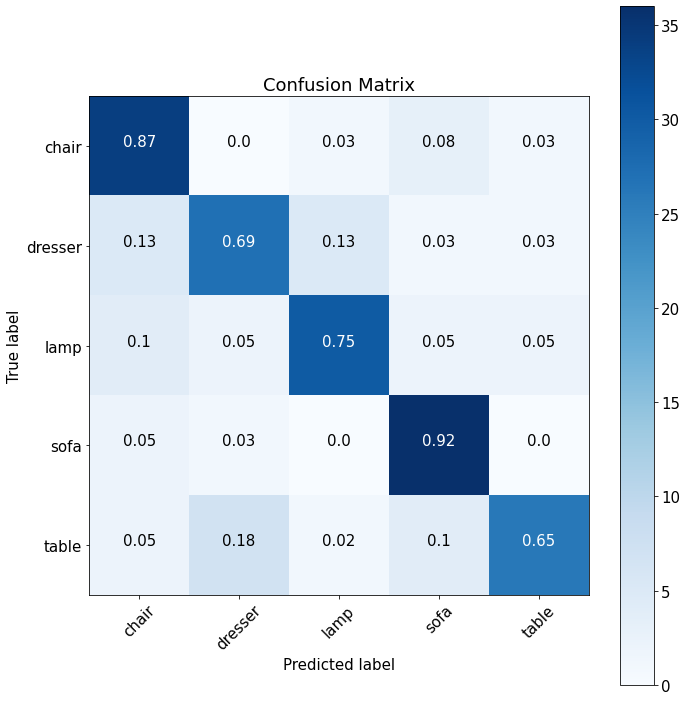

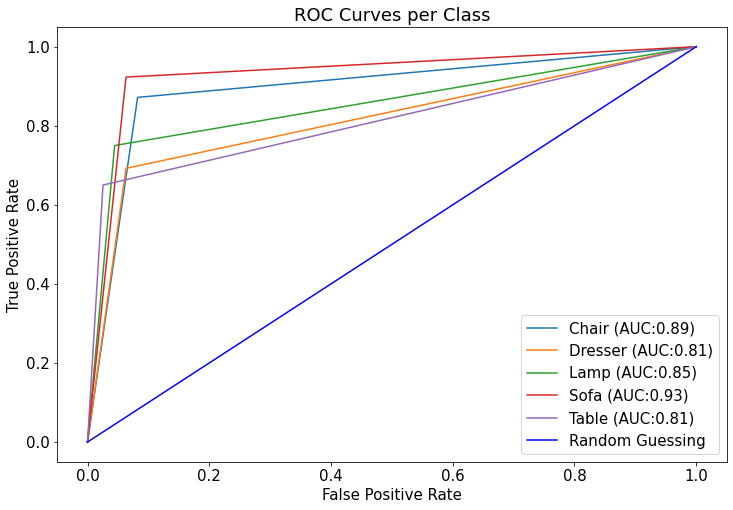

ROC AUC score: 0.8608255033418301
Classification Report
              precision    recall  f1-score   support

       chair       0.72      0.87      0.79        39
     dresser       0.73      0.69      0.71        39
        lamp       0.81      0.75      0.78        40
        sofa       0.78      0.92      0.85        39
       table       0.87      0.65      0.74        40

    accuracy                           0.78       197
   macro avg       0.78      0.78      0.77       197
weighted avg       0.78      0.78      0.77       197


-------- TERMINATED FOLD: 1 --------


In [5]:
# define model to be trained and tested
inputs = Input(shape=(TARGET_SIZE, 3))

# Conv1D and MaxPooling1D
features_8 = layers.Conv1D(8, 8, activation="relu")(inputs)
features_16 = layers.Conv1D(16, 16, activation="relu")(inputs)
features_32 = layers.Conv1D(32, 32, activation="relu")(inputs)
features_64 = layers.Conv1D(64, 64, activation="relu")(inputs)
pooled_features_8 = layers.GlobalMaxPooling1D()(features_8)
pooled_features_16 = layers.GlobalMaxPooling1D()(features_16)
pooled_features_32 = layers.GlobalMaxPooling1D()(features_32)
pooled_features_64 = layers.GlobalMaxPooling1D()(features_64)

# concatenate features
concatenated_features = concatenate([pooled_features_8, pooled_features_16, pooled_features_32, pooled_features_64])

# feature extraction
x = layers.Dense(128, activation="relu")(concatenated_features)
x = layers.Dropout(0.5)(x)

# output softmax classifier
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

# define model
model = Model(inputs=inputs, outputs=outputs, name="Experiment-5")

# train, validate and test
pointclouds_kfold_validation_model(model_name="Experiment-5", n_splits=6, test_size=0.05,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=32, one_fold=True, resample_data=0, augment=True)

## Experiment 6 - Remove Smaller Conv1D Layers, Reduced Test Size

Found 99 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 3193 validated pointcloud filenames belonging to 5 classes.
Found 639 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2033, 16)     784         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 2017, 32)     3104        ['input_1[0][0]']                
                                                      

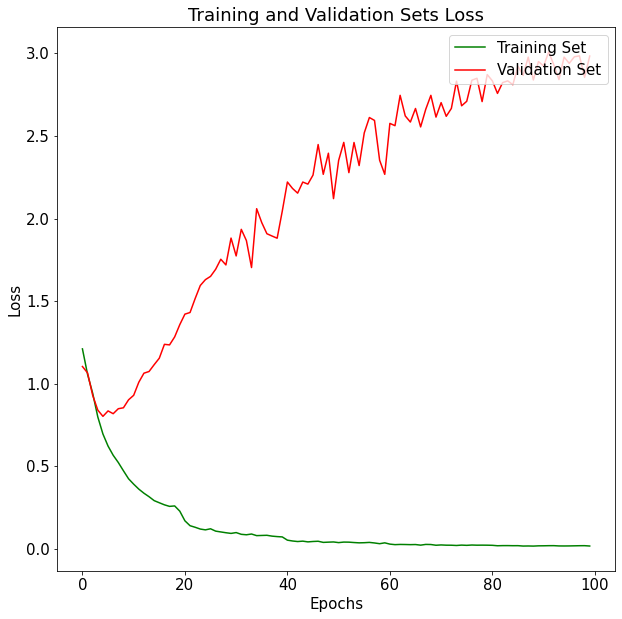

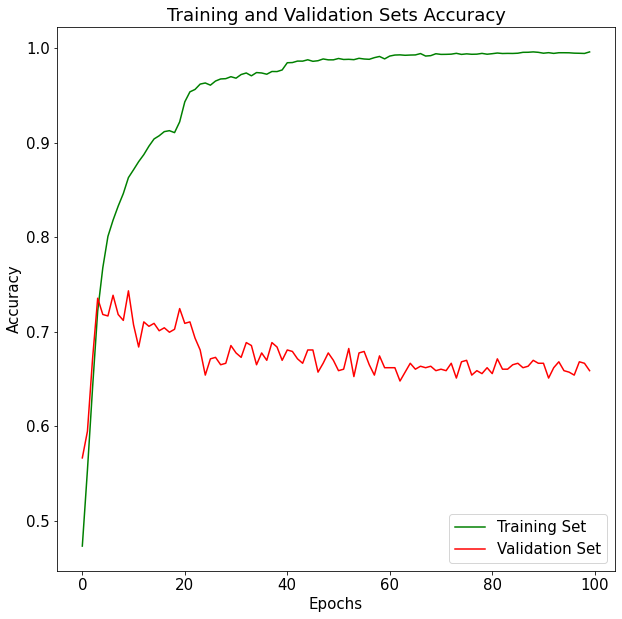

4/4 [==============================] - 0s 3ms/step - loss: 1.2059 - sparse_categorical_accuracy: 0.7071
Best model Test Loss: 1.205863356590271
Best model Test Accuracy: 0.7070707082748413
Confusion Matrix
Normalized confusion matrix


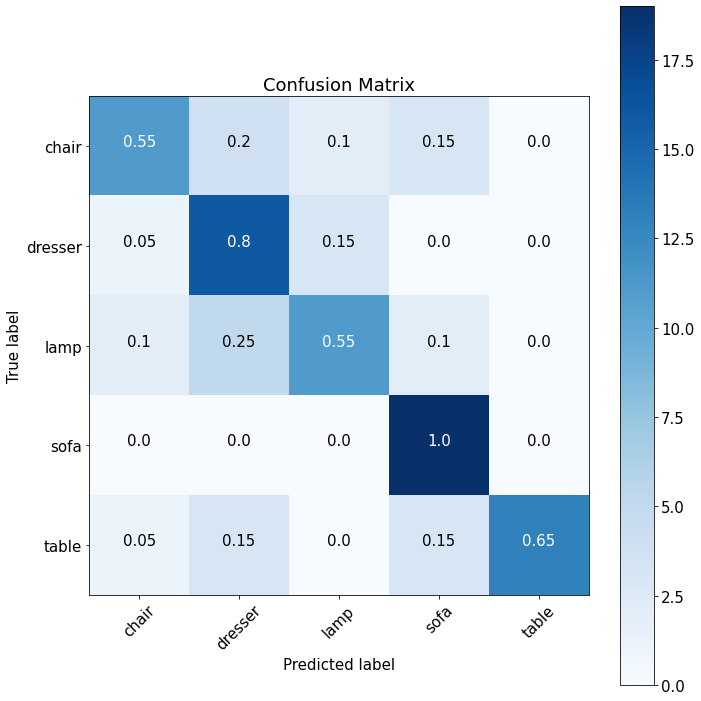

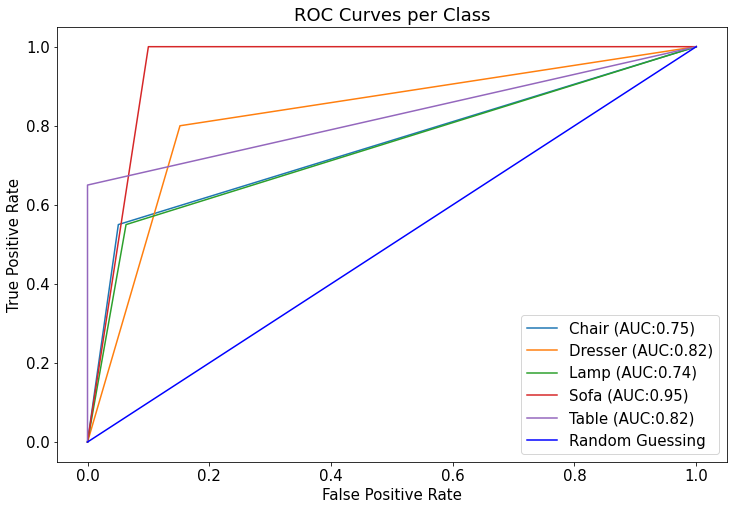

ROC AUC score: 0.8184177215189873
Classification Report
              precision    recall  f1-score   support

       chair       0.73      0.55      0.63        20
     dresser       0.57      0.80      0.67        20
        lamp       0.69      0.55      0.61        20
        sofa       0.70      1.00      0.83        19
       table       1.00      0.65      0.79        20

    accuracy                           0.71        99
   macro avg       0.74      0.71      0.70        99
weighted avg       0.74      0.71      0.70        99


-------- TERMINATED FOLD: 1 --------


In [6]:
# define model to be trained and tested
inputs = Input(shape=(TARGET_SIZE, 3))

# Conv1D and MaxPooling1D
features_16 = layers.Conv1D(16, 16, activation="relu")(inputs)
features_32 = layers.Conv1D(32, 32, activation="relu")(inputs)
features_64 = layers.Conv1D(64, 64, activation="relu")(inputs)
pooled_features_16 = layers.GlobalMaxPooling1D()(features_16)
pooled_features_32 = layers.GlobalMaxPooling1D()(features_32)
pooled_features_64 = layers.GlobalMaxPooling1D()(features_64)

# concatenate features
concatenated_features = concatenate([pooled_features_16, pooled_features_32, pooled_features_64])

# feature extraction
x = layers.Dense(128, activation="relu")(concatenated_features)
x = layers.Dropout(0.5)(x)

# output softmax classifier
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

# define model
model = Model(inputs=inputs, outputs=outputs, name="Experiment-6")

# train, validate and test
pointclouds_kfold_validation_model(model_name="Experiment-6", n_splits=6, test_size=0.025,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=32, one_fold=True, resample_data=0, augment=True)

## Experiment 7 - Same Conv1D Filters of `Experiment 4`, Reduced Test Size

Found 50 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 3234 validated pointcloud filenames belonging to 5 classes.
Found 647 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 2041, 16)     400         ['input_2[0][0]']                
                                                                                                  
 conv1d_4 (Conv1D)              (None, 2033, 32)     1568        ['input_2[0][0]']                
                                                      

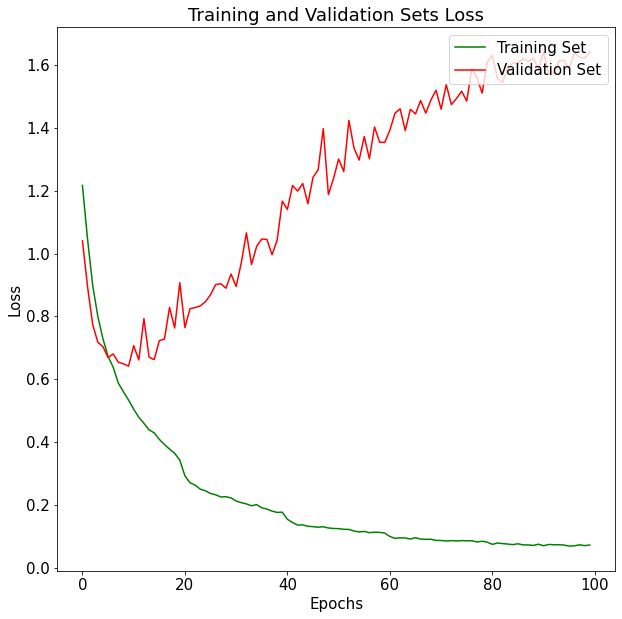

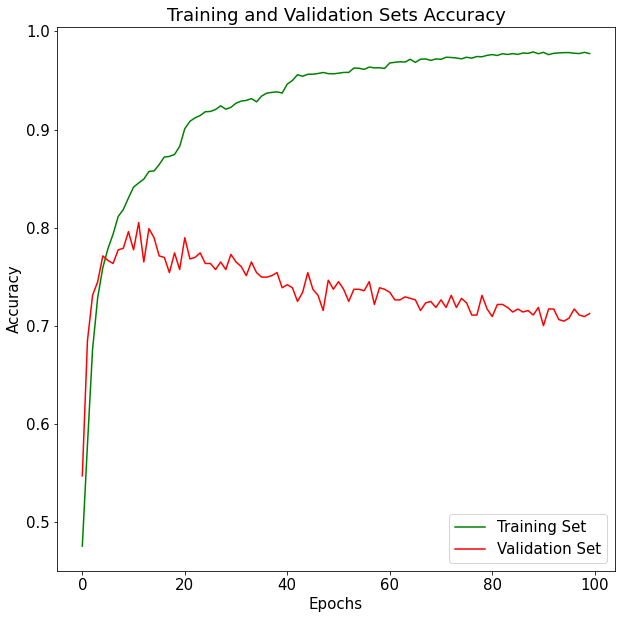

2/2 [==============================] - 0s 15ms/step - loss: 0.6370 - sparse_categorical_accuracy: 0.8000
Best model Test Loss: 0.6369979381561279
Best model Test Accuracy: 0.800000011920929
Confusion Matrix
Normalized confusion matrix


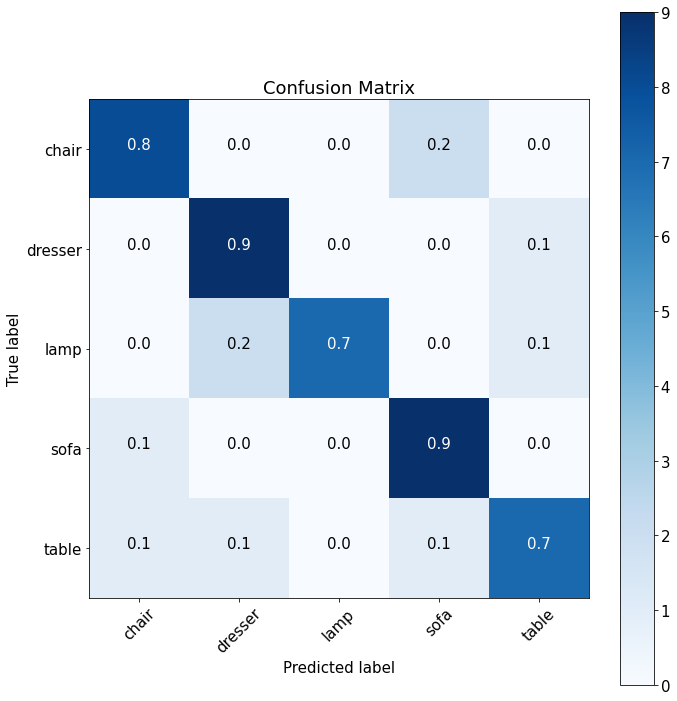

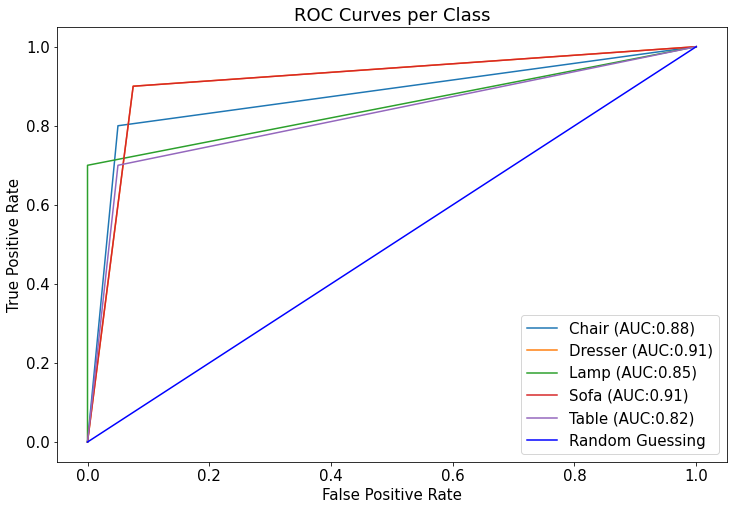

ROC AUC score: 0.875
Classification Report
              precision    recall  f1-score   support

       chair       0.80      0.80      0.80        10
     dresser       0.75      0.90      0.82        10
        lamp       1.00      0.70      0.82        10
        sofa       0.75      0.90      0.82        10
       table       0.78      0.70      0.74        10

    accuracy                           0.80        50
   macro avg       0.82      0.80      0.80        50
weighted avg       0.82      0.80      0.80        50


-------- TERMINATED FOLD: 1 --------


In [8]:
# define model to be trained and tested
inputs = Input(shape=(TARGET_SIZE, 3))

# Conv1D and MaxPooling1D
features_8 = layers.Conv1D(16, 8, activation="relu")(inputs)
features_16 = layers.Conv1D(32, 16, activation="relu")(inputs)
features_32 = layers.Conv1D(64, 32, activation="relu")(inputs)
pooled_features_8 = layers.GlobalMaxPooling1D()(features_8)
pooled_features_16 = layers.GlobalMaxPooling1D()(features_16)
pooled_features_32 = layers.GlobalMaxPooling1D()(features_32)

# concatenate features
concatenated_features = concatenate([pooled_features_8, pooled_features_16, pooled_features_32])

# feature extraction
x = layers.Dense(128, activation="relu")(concatenated_features)
x = layers.Dropout(0.5)(x)

# output softmax classifier
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

# define model
model = Model(inputs=inputs, outputs=outputs, name="Experiment-7")

# train, validate and test
pointclouds_kfold_validation_model(model_name="Experiment-7", n_splits=6, test_size=0.0125,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=32, one_fold=True, resample_data=0, augment=True)

## Experiment 8 - Double Dense Layer for Feature Extraction

Found 50 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 3234 validated pointcloud filenames belonging to 5 classes.
Found 647 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2041, 16)     400         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 2033, 32)     1568        ['input_1[0][0]']                
                                                      

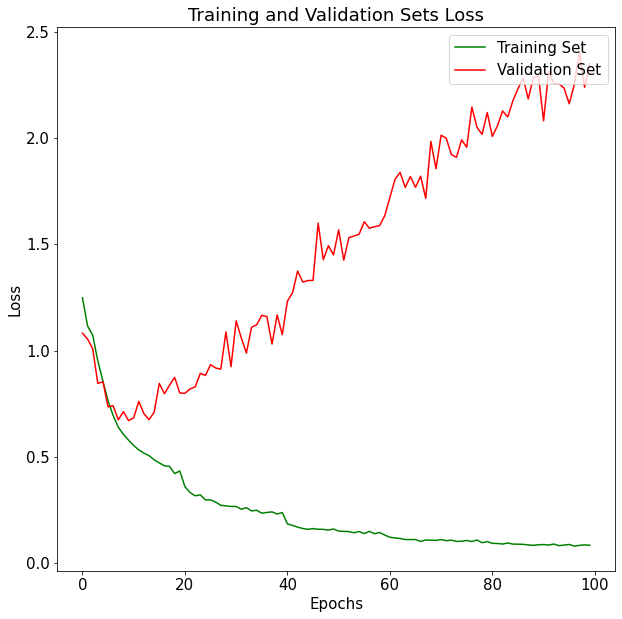

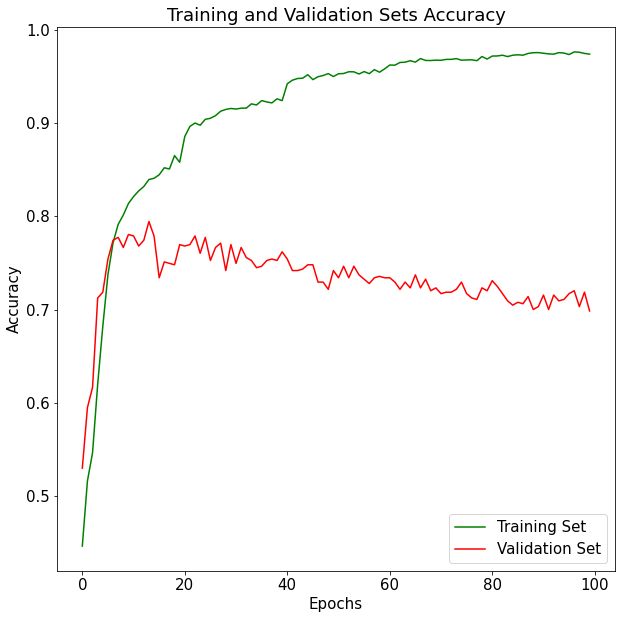

2/2 [==============================] - 0s 4ms/step - loss: 0.4436 - sparse_categorical_accuracy: 0.8400
Best model Test Loss: 0.4436357021331787
Best model Test Accuracy: 0.8399999737739563
Confusion Matrix
Normalized confusion matrix


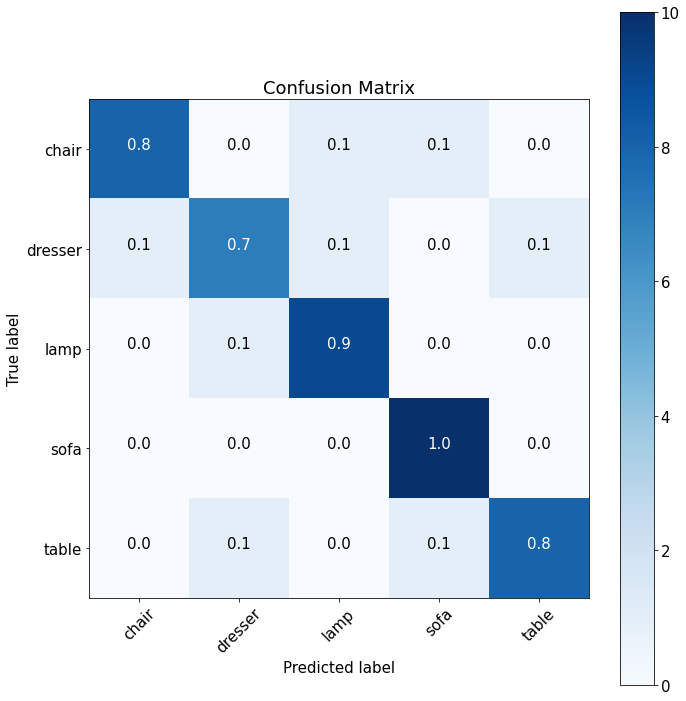

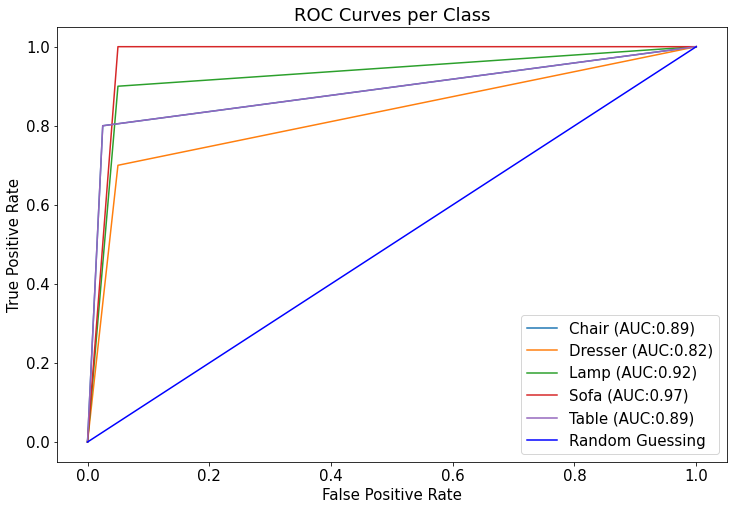

ROC AUC score: 0.9
Classification Report
              precision    recall  f1-score   support

       chair       0.89      0.80      0.84        10
     dresser       0.78      0.70      0.74        10
        lamp       0.82      0.90      0.86        10
        sofa       0.83      1.00      0.91        10
       table       0.89      0.80      0.84        10

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50


-------- TERMINATED FOLD: 1 --------


In [9]:
# define model to be trained and tested
inputs = Input(shape=(TARGET_SIZE, 3))

# Conv1D and MaxPooling1D
features_8 = layers.Conv1D(16, 8, activation="relu")(inputs)
features_16 = layers.Conv1D(32, 16, activation="relu")(inputs)
features_32 = layers.Conv1D(64, 32, activation="relu")(inputs)
pooled_features_8 = layers.GlobalMaxPooling1D()(features_8)
pooled_features_16 = layers.GlobalMaxPooling1D()(features_16)
pooled_features_32 = layers.GlobalMaxPooling1D()(features_32)

# concatenate features
concatenated_features = concatenate([pooled_features_8, pooled_features_16, pooled_features_32])

# feature extraction
x = layers.Dense(256, activation="relu")(concatenated_features)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# output softmax classifier
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

# define model
model = Model(inputs=inputs, outputs=outputs, name="Experiment-8")

# train, validate and test
pointclouds_kfold_validation_model(model_name="Experiment-8", n_splits=6, test_size=0.0125,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=32, one_fold=True, resample_data=0, augment=True)